# Ising Model (incl. Monte Carlo & SW-algorithm)

In [8]:
%matplotlib inline
import time as tm
from types import SimpleNamespace

from importlib import reload
import Ising_simulation
reload(Ising_simulation)
from Ising_simulation import *



# Simulation initialisation
sim = SimpleNamespace(MC_steps = 100,       # Number of monte carlo steps
                      eq_data_points = 90,  # Number of equilibrium data points in MC steps
                      L = 20,               # Grid size in 1 dimension
                      T = 3,                # Initial temperature
                      T_steps = 60,         # Number of temperature steps
                      dT = -0.025,          # Temperature increment
                      T_c = 2.2727,         # Critical Temperature
                      h = 0,                # Initial magnetic field
                      dh = 0,               # Magnetic increment
                      J = 1,                # Coupling J (Keep at 1)
                      kb = 1,               # Boltzman constant (Keep at 1)
                      spin_init = 'up',     # Initial spin grid (up, down or random)
                      algorithm = 'SW',     # SW (Swendesen Wang) or SF (Spin Flip)
                      cor_cal = False,
                      bs_trials = 1000
                      )

sim.spin_site_total_number = sim.L**2       # Total number of spin sites
sim.MCS = sim.L**2                          # Montecarlo step size
sim.time_steps = sim.MCS * sim.MC_steps     # Montecarlo time to regular time steps

# Simulation results
results = IM_sim(sim)

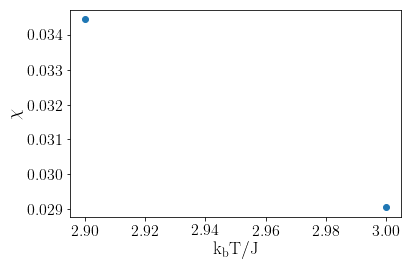

In [9]:
import plotting
reload(plotting)
from plotting import *

sim.fig_dir = './exported_figs/'
sim.save_fig = True

plot_func(sim, results)
visualize_islands(sim, results)
grid_plot(sim, results)

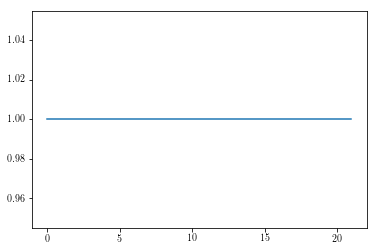

In [5]:
### Wip, plot of last correlation
data = results.cor_fun_chi
length = len(data)
plt.plot(range(length), data)
plt.show()
